## Un clasificador basado en redes neuronales.

Veamos el siguiente ejemplo:

<img src="https://github.com/lcharlin/80-629/blob/master/week5-NeuralNetworks/images/nn.png?raw=1" width="700">



### Supongamos que los parámetros son: 

\begin{aligned}
& w_1 = -5 & w_2 = 10 && w_3 = 5 \\
& w_4 = -10 & w_5 = 20 && w_6 = 20 \\
& b_1 = 25 & b_2 = 40 && b_3 = -30 
\end{aligned}



 | x1 | x2 | o | etiqueta |
 |-------|-------|-----|-------|
 | 4     | -4    |     |       |
 |-4     | 4     |     |       |
 | -4    | -4    |     |       |
 | 4     | 4     |     |       |

In [4]:
import numpy as np
import matplotlib.pyplot as plt


X_train = [[5.333388280127689, 1.5582069812048474], [1.4205481735444083, -0.5278249568422595], 
 [3.472562046019128, -3.0261140932519086], [-3.5177426888471195, 1.1300148226791986], 
  [0.33272851625262234, -4.142218394709545], [5.744197978530449, 1.1276060893425157], 
   [3.4441795203818852, -5.747642075964974], [1.754006444921398, -0.9335617680077597], 
    [-1.3897135822473672, -2.390480160038469], [-2.8045407430742326, 5.2450060812131305], 
     [5.711018865612925, 3.271877894537937], [3.8966493168057905, -5.925223694919396], 
      [-3.682386668972864, -5.454551808068674], [-5.4921818875684245, -3.2132158625489042], 
       [-1.221458656468064, 5.3529628442850985], [2.542165216067408, 0.6914680167178044], 
        [2.470376457518908, 1.6178017163796135], [-3.7655124932857196, -3.333744638168339], 
         [-4.33052400749027, 5.41407897586388], [-1.7943882396624211, 3.3108026219608178], 
          [-1.5934596732320792, -2.126879219735008], [3.4970481135585167, 4.759394901485942], 
           [-1.434801688117366, -3.781372876254127], [-0.29918569387895033, 3.8631433962558717], 
            [2.414524652210318, 1.0026746599887835], [1.5735425765243338, 0.21901841572000436], 
             [-2.586336813041203, 3.0597366693797206], [4.564872741652483, 0.02041610669353844], 
              [5.927530176952661, -2.320876616986742], [4.640222353336911, -2.4870695726354826], 
               [-5.037321915901843, 5.094392498372866], [5.915995996868112, 5.496626589650177], 
                [-4.843904468232625, 1.2272113478634274], [-1.3263195611679013, -5.5485694750202885], 
                 [-5.957926959715513, 3.714022739273405], [5.307185521170732, 1.2232157601716729], 
                  [-2.1068464372459363, 3.0690211558859737], [3.152232169720971, 0.48245813186422115], 
                   [2.9955226477868617, 3.5794909674769215], [3.2899289489000942, 3.194489141574344], 
                    [4.036381328411652, -1.4906633094316213], [-0.38178472761912374, 5.486388275866696], 
                     [-4.77283921581248, 5.970895792471625], [3.4245828616980205, 4.378730370601053], 
                      [2.2267929854734714, 0.2832392623544209], [1.9226504496523358, 2.5243830927534994], 
                       [4.578271598581999, -5.676277423179987], [0.11687977727803656, 0.7974330663130624], 
                        [-1.0189234223259636, -5.88107877960401], [1.3656991809266508, -2.9985698142138055], 
                         [0.5307790278883253, 2.3813440708815], [1.4667474186826235, 0.5652374229755406], 
                          [-5.900035845956632, -4.184289577741607], [5.670034108782861, -3.999359990473254], 
                           [2.042032878446335, 3.206669833619671], [-4.671807535787229, -2.64516403791304], 
                            [5.682043616852459, -3.0469417444282163], [1.9536740166169855, -0.4728127723512605], 
                             [2.9379675763740405, -1.9781635606355001], [1.2758364828729682, -5.561775598682441], 
                              [-0.08138533061559627, -0.5920578272059291], [-4.964545768821617, 0.3167072102941759], 
                               [4.430602683489411, -0.30323496672908146], [-0.33709031385294885, -3.8440140376341674], 
                                [-0.22093326439788008, -4.211525029191426], [-5.085171860273105, -2.1993483801477636], 
                                 [4.219235065124298, 5.441227938129096], [-5.177514627055158, -5.547693119033099], 
                                  [3.989059147871192, -3.6645443485096014], [1.9197872781534935, 4.021856435335641], 
                                   [-4.101969514623855, 4.515889194186421], [2.555610725420552, -1.2326954101888843], 
                                    [4.7448545674683515, 0.2686747871393491], [-1.037673222767407, 2.1108685900161106], 
                                     [-4.592689201170206, 5.991375134549454], [-2.8649601909213387, 3.7571055382040566], 
                                      [0.30045947865627376, -1.118668008398127], [-0.194974689171028, 0.30820539224203536], 
                                       [-1.1615743482514134, 4.905385050447709], [-5.730748311603454, -0.4135407392840129], 
                                        [1.3532674231549766, 0.7215525306357726], [5.038869254234449, -0.20590977529285848],
                                           [-4.117074039237305, 2.960738480385542], [-2.318227599650836, 5.325648033609845], 
                                            [-4.394772687038887, -0.8682134674873989], [-3.069365717368568, -0.5819548167016713], 
                                             [0.04041981156825969, 4.467119123009848], [-0.7776144978459776, -2.757257305497995], 
                                              [-5.316794761638551, -3.1426398437452514], [-2.503497208292265, -1.4487864821843193], 
                                               [5.8230196591557455, 1.045088173084344], [1.1748105590454578, -5.892620313975549], 
                                                [4.133575917374145, -0.2649973886489718], [-1.3839445863374014, -1.7943612594129643], 
                                                 [-3.0230588443083355, 1.8921395794836213], [5.029742583193558, 4.56770647599553], 
                                                  [0.10355070317047499, -5.670355420761925], [3.9916154317788184, -4.257992447171093], 
                                                   [-3.8343240169954997, -3.7557124369239654], [-3.8591330320756794, -5.378803831940173]]
y_train = [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1]
X_test = [[-2.5566644592171954, 4.473504633518846], [-1.0438207214665898, 3.094503769187293], 
 [-3.186491098671045, 4.509482974639109], [3.4822334052136714, -2.531474775975362], 
  [-5.878168317437792, 3.185571936516606], [1.1511024291659648, -0.5854527219339616], 
   [-2.6809225893633597, 2.8581382685901353], [5.723571145170791, 4.952762297593402], 
    [-4.440475494294502, 5.9756293855193015], [-0.38961337399164364, 1.1057664613125509], 
     [-2.983179073240498, -2.6955693419727953], [-5.925062572490839, 3.1792037181934916], 
      [1.694443799998595, 0.7482274212147626], [1.6147262608014543, -3.3551032240193424], 
       [1.7804340052649188, 0.659776297445493], [-1.3035830236692538, 0.9878007582811597], 
        [0.5155060539469023, -3.9113690555341725], [5.361886664032925, -0.874091380376524], 
         [2.995784764766203, 2.825922360392644], [-2.5090693498297543, -5.066957894527421], 
          [-4.520369861568518, 1.3532563934285449], [1.6420162093066493, 1.5244206006588819], 
           [3.766669879331255, 0.4171088600646069], [5.122610457005056, -5.99173110225178], 
            [4.950248601096057, 3.3973917775002427], [-1.0029657140145734, 2.6210709591836956], 
             [2.2451953323147187, -1.827884384646004], [1.7168476417922225, -1.6935935196248266], 
              [-2.496881603231553, 2.6724891929903123], [4.361333514529537, -1.757118081583263], 
               [-3.2939685569552744, -2.6716246018676713], [-2.910171873805518, 5.46204600328862], 
                [0.19854656106731206, 2.069328579647795], [0.2754663813183944, 0.5517590335306171], 
                 [-2.214292664443048, 2.456389649365141], [-2.202284801207364, 1.7835475924007724], 
                  [2.3667047468410303, -5.055194746724654], [3.7294609928568327, 4.883181751212376], 
                   [-2.7324534182448743, -4.189163574498891], [3.2451436425664575, 5.495948799869421], 
                    [0.4055708951412269, 5.760161354761216], [0.055328954954518395, -1.1280478565686227], 
                     [-4.782033906586113, 1.1769745186096232], [-4.112365299647889, -4.997225961856845], 
                      [0.2935244381677098, 5.664615812330897], [-4.360856756697897, -5.9535894353249805], 
                       [2.6557895223632553, 5.101587111362285], [0.012095854873948042, -1.5197903121309313], 
                        [3.11072397424992, 2.062653977857149], [2.9422184311791817, -4.2502170842853015], 
                         [5.986282025761348, -1.1154116124765938], [1.764378026850009, 0.9701270806204079], 
                          [0.8785189368505844, 4.901867485581008], [-4.700702917977921, 4.96341523151893], 
                           [-1.0164299347984809, -0.2652881377638412], [0.6303071861752656, -2.4852826318326757], 
                            [-5.320430792766462, -4.223237078408443], [-2.5488703969774518, 5.3294199577527905],
                             [-4.619072034063718, 1.5701485623552713], [-2.251217935274917, -4.945066412239152], 
                              [-0.661075887552192, 4.113097193419575], [-4.5020864906544835, 4.3031247861764985],
                               [5.6167069647381656, 3.886477746187552], [0.5731565433733987, -3.2314079038216104],
                                 [-3.2224925999168126, 1.1943645853010256], [-4.516009245873252, 0.09166343423093082], 
                                  [2.698009121336133, -0.39458787715331667], [-1.2123653862198491, 1.3882930257912935], 
                                   [-1.8162440470147514, -1.5438183389849272], [-1.5020184028840617, -0.4940873560461654], 
                                    [-2.0135833028179144, 1.3929532770301307], [-5.826176740886474, -0.16775558682492786], 
                                     [-5.628395485475977, 2.9043596516118804], [-0.17488180046095003, 3.5548479415735663], 
                                      [-2.363825653655659, 1.0680441630718747], [-5.40533276364725, -4.093019949066052], 
                                       [-0.9704412278262327, -3.527333766574692], [1.936253299376899, -4.646643761739931], 
                                        [5.667059575104384, -5.325368364606867], [2.9069595082533297, 0.49133570710614016], 
                                         [-5.36348949604589, -5.393435704976108], [-2.0299051411145976, -3.9455879812109504], 
                                          [4.866679724122228, -4.331500660577966], [-0.08500176564343143, 1.337483706382697], 
                                           [0.1511417921371745, -1.4296224094452317], [4.612993565823672, 0.9815036727417006], 
                                            [-4.131996020717862, -4.999386844660294], [-2.73583354402925, 1.1497704274838014], 
                                             [3.673627645444453, 4.106614020913122], [3.031384709491247, 2.613899236100993], 
                                              [-3.4775118267727945, 2.4072423676017785], [-1.7113310734016265, -2.9954295230815693], 
                                               [-4.860369276619923, -2.493492843892378], [-3.478791439468534, 2.7394029611059807], 
                                                [-2.945050188206907, -2.0182796493702275], [-3.396160587434877, 2.8625728026912682], 
                                                 [-4.162006497769895, 5.8863652608535535], [0.1750797080046791, -3.05000405466802], 
                                                  [-2.703858121582277, -2.030493862794368], [1.524261482290541, -4.749345646801595]]
y_test = [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]


def load_data():
    return X_train, y_train, X_test, y_test

In [5]:
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

def nn1(x1, x2, w1, w2, w3, w4, w5, w6, b1, b2, b3):
    h1 = sigmoid(w1*x1 + w3*x2 + b1)
    h2 = sigmoid(w2*x1 + w4*x2 + b2)
    o = sigmoid(w5*h1 + w6*h2 + b3)
    return o

## Encontremos los parámetros:


In [6]:
X_train, y_train, X_test, y_test = load_data()          

`plot_data`:

In [7]:
def plot_data(X_train, y_train, X_test, y_test):

    def get_series(X):
        x1 = []
        x2 = []
        for i, j in X:
            x1.append(i)
            x2.append(j)
        return (x1, x2)

    X_train_positive = []
    X_train_negative = []
    X_test_positive = []
    X_test_negative = []

    for i, x in enumerate(X_train):
        if y_train[i] == 1:
            X_train_positive.append(x)
        else:
            X_train_negative.append(x)

    for i, x in enumerate(X_test):
        if y_test[i] == 1:
            X_test_positive.append(x)
        else:
            X_test_negative.append(x)

    x1, x2 = get_series(X_train_positive)
    plt.plot(x1, x2, 'o', color='yellow', label='train +')

    x1, x2 = get_series(X_train_negative)
    plt.plot(x1, x2, 'o', color='green', label='train -')

    x1, x2 = get_series(X_test_positive)
    plt.plot(x1, x2, 'x', color='yellow', label='test +')

    x1, x2 = get_series(X_test_negative)
    plt.plot(x1, x2, 'x', color='green', label='test -')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.gca().set_aspect('equal')


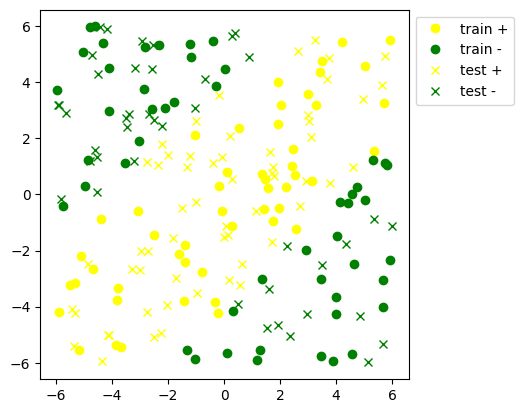

In [8]:
plot_data(X_train, y_train, X_test, y_test)

Como puede ver, estos datos no son linealmente separables. En otras palabras, los ejemplos positivos y negativos no se pueden separar usando un clasificador lineal. Nuestro objetivo para el resto de esta sesión de cuaderno es aprender los parámetros de un modelo de red neuronal que puede separar los ejemplos positivos de los negativos.

¿Qué queremos decir con *aprender los parámetros*? Recuerda que nuestra red neuronal tiene 9 parámetros incluyendo tres sesgos ($w_1, \ldots, w_6, b_1, b_2, b_3$). Cada asignación diferente de valores a estos parámetros conduce a un clasificador diferente. Queremos encontrar el que mejor coincida con nuestros datos.


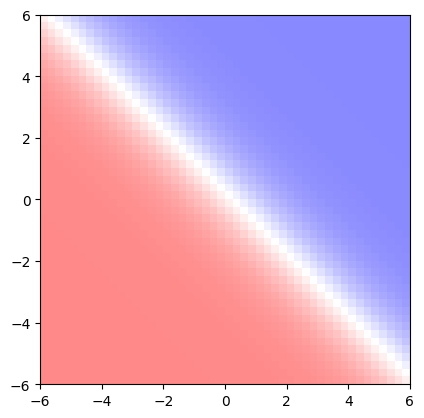

In [10]:
def nn_p(w1, w2, w3, w4, w5, w6, b1, b2, b3):
    def nn_(x1, x2):
        h1 = sigmoid(w1*x1 + w3*x2 + b1)
        h2 = sigmoid(w2*x1 + w4*x2 + b2)
        o = sigmoid(w5*h1 + w6*h2 + b3)
        return o
    return nn_


def plot_boundaries(w1, w2, w3, w4, w5, w6, b1, b2, b3):

    nn = nn_p(w1, w2, w3, w4, w5, w6, b1, b2, b3)

    delta = 0.25
    X = Y = np.arange(-6.0, 6.0, delta)
    Z = [[nn(x, y) for x in X] for y in Y]
    plt.imshow(Z, origin='lower',
               extent=[-6, 6, -6, 6],
               cmap='bwr_r',
               vmin=0, vmax=1)
    
w1 = 1; w2 = 1; w3 = 1; w4 = 1; w5 = 1; w6 = 1
b1 = 0; b2 = 0; b3 = -1
plot_boundaries(w1, w2, w3, w4, w5, w6, b1, b2, b3)

Proyectamos los datos sobre las fronteras de decisión: 

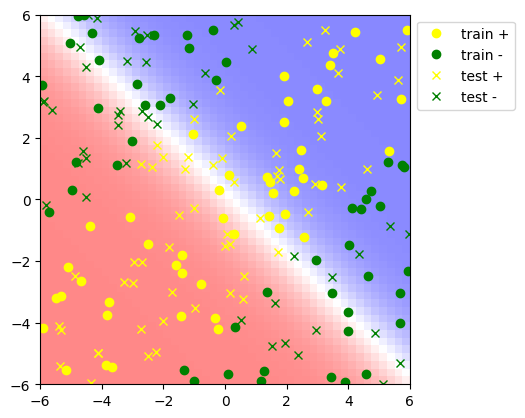

In [11]:
plot_boundaries(w1, w2, w3, w4, w5, w6, b1, b2, b3)
plot_data(X_train, y_train, X_test, y_test)

Parece que el clasificador obtenido usando el conjunto de parámetros anterior no coincide con nuestros datos. (Por supuesto, esto es de esperar. Este clasificador con pesos fijos a priori tiene un sesgo alto y una varianza baja).



In [12]:
w1 = -1; w2 = -1; w3 = -1; w4 = -1; w5 = 4; w6 = -3
b1 = -4; b2 = 4; b3 = 1

In [13]:
w1 = 1; w2 = -1; w3 = -1; w4 = -1; w5 = -4; w6 = 3
b1 = 4; b2 = -4; b3 = 2

In [14]:
w1 = -1; w2 = 2; w3 = 1; w4 = -2; w5 = 4; w6 = 4
b1 = 5; b2 = 8; b3 = -6

## Función de pérdida

Una *función de pérdida* evalúa cuánto difieren las predicciones de nuestro clasificador de las etiquetas reales. La función de pérdida que usaremos para nuestra red es la pérdida de *entropía cruzada binaria*. Representemos nuestros datos de entrenamiento por el conjunto $\{(X_1, y_1), \ldots, (X_n , y_n)\}$ y nuestra función de red neuronal por $f$. Entonces la función de pérdida de entropía cruzada binaria se definirá como:

\begin{equation}
    \ell = \sum_{i=1}^n -y_i \log f(X_i) - (1-y_i) log(1-f(X_i))
\end{equation}

La entropía cruzada binaria se relaciona con la distribución de Bernoulli (maximizar la probabilidad de Bernoulli es equivalente a minimizar la entropía cruzada binaria). **Es la función de pérdida la que debería usarse para problemas de clasificación binaria.**

### Consideremos la siguiente tabla:

|X|f(X)|y|
|:---|:---|:---|
|(5.4, 1.6)|1|1|
|(1.4, -0.5)|0.3679|1|
|(3.5, -3)|0.8647|0|
|(-3.5, 1.1)|0|0|



In [15]:
np.log(0.5)

-0.6931471805599453

Es importante recordar que la función de pérdida $l$ es una función de los parámetros de la red, ya que se define en términos de la salida de la red. Podemos escribir la función de pérdida como:

\begin{equation}
    \ell(\mathbf{w}, \mathbf{b}) = \sum_{i=1}^n -y_i \log f(X_i, \mathbf{w}, \mathbf{b}) - (1-y_i) log(1-f(X_i, \mathbf{w}, \mathbf{b}))
\end{equation}

Queremos encontrar el conjunto de parámetros $\mathbf{w}, \mathbf{b}$ para los cuales $\ell(\mathbf{w}, \mathbf{b})$ tenga el valor mínimo. Usaremos el *gradient descent* para encontrar estos valores. 

### Minimización por Descenso Gradiente

 $f(x_1, x_2) = x_1^2 + x_2^2$:

<img src="https://github.com/lcharlin/80-629/blob/master/week5-NeuralNetworks/images/descent.png?raw=1" width="700">


### Pregunta 4
El punto A en la gráfica tiene las coordenadas $(1, 1, 3)$. El vector azul AB muestra la dirección $(-1, -1)$ y el vector verde AC muestra la dirección $(0, -1)$.
Supongamos que estamos en el punto inicial $(1, 1)$ y queremos movernos en una dirección que minimice la función $f$. ¿Cuál de estas dos direcciones se mueve más rápido hacia el mínimo: $(-1, -1)$ o $(0, -1)$?

### Pregunta 5
Calcula el gradiente de la función $f$ en el punto $(1, 1)$. ¿Cómo se relaciona este gradiente con el camino más rápido hacia el mínimo (es decir, el descenso más pronunciado)?

## Entrenando a la red neuronal


In [16]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(2,), 
                    activation='logistic', 
                    solver='lbfgs',
                    random_state=0,
                    max_iter=500,
                    tol=1e-7)

El argumento `hidden_layer_sizes=(2,)` establece que solo tenemos una capa oculta con dos neuronas, y el argumento `activation='logistic'` muestra que usamos la función de activación sigmoidea . 



In [17]:
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=500,
              random_state=0, solver='lbfgs', tol=1e-07)

Usamos la función `tiny_net_parameters` para obtener los parámetros de la red entrenada:

In [18]:
def tiny_net_parameters(clf):
    [[[w1, w2], [w3, w4]], [[w5], [w6]]] = [i.tolist() for i in clf.coefs_]
    [[b1, b2], [b3]] = [i.tolist() for i in clf.intercepts_]
    return (w1, w2, w3, w4, w5, w6, b1, b2, b3)

w1, w2, w3, w4, w5, w6, b1, b2, b3 = tiny_net_parameters(clf)

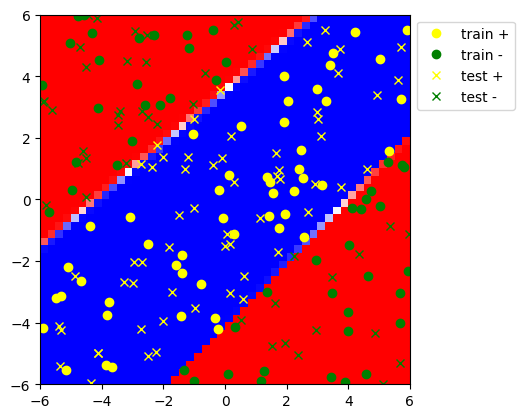

In [19]:
plot_boundaries(w1, w2, w3, w4, w5, w6, b1, b2, b3)
plot_data(X_train, y_train, X_test, y_test)

El clasificador hace un buen trabajo al predecir etiquetas tanto para los ejemplos de entrenamiento como para los ejemplos no vistos (datos de prueba). 

--- 

Además de los límites de decisión en el espacio de datos original, también podemos visualizar cómo se transforman los datos a través de las redes neuronales. Como usamos una capa oculta con dos neuronas, podemos visualizar su "salida" en dos dimensiones.



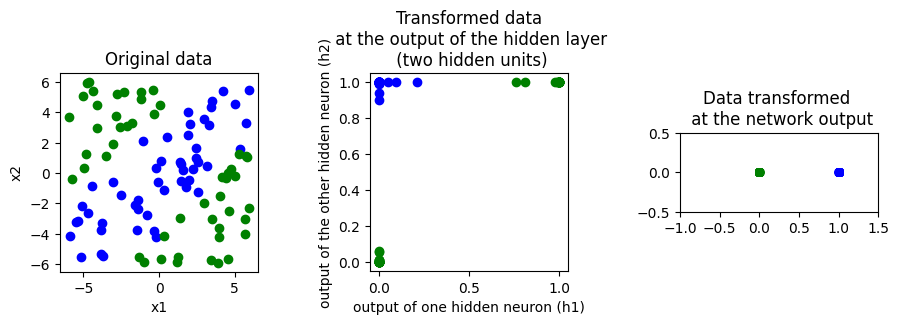

In [22]:
def plot_data_transformations(data_x, data_y, w1, w2, w3, w4, w5, w6, b1, b2, b3, language='English'): 
    from scipy.special import expit
    import matplotlib.ticker as ticker
    
    data_x = np.array(data_x)
    data_y = np.array(data_y)

    fig, axs = plt.subplots(1, 3, figsize=(10,10))
    fig.tight_layout(pad=5.0)
    axs[0].set_aspect('equal')
    axs[1].set_aspect('equal')
    axs[2].set_aspect('equal')

    
    if language == 'English':
        axs[0].set_title('Original data')
    else: 
        axs[0].set_title('Données originales')
    axs[0].set_xlabel('x1')
    axs[0].set_ylabel('x2')
    idx = (data_y>0)
    x1 = data_x[idx,0]
    x2 = data_x[idx,1]
    axs[0].scatter(x1, x2, c='blue')
    
     
    idx = (data_y<0.5)
    x1 = data_x[idx,0]
    x2 = data_x[idx,1]
    axs[0].scatter(x1, x2, c='green')
    
    if language == 'English':
        axs[1].set_title('Transformed data\n at the output of the hidden layer\n (two hidden units)')
        axs[1].set_xlabel("output of one hidden neuron (h1)")
        axs[1].set_ylabel("output of the other hidden neuron (h2)")
    else:
        axs[1].set_title('Données transformées \n à la sortie de la couche cachée\n (deux unités cachés)')
        axs[1].set_xlabel("sortie d'un neurone caché")
        axs[1].set_ylabel("sortie de l'autre neurone caché")
    # una clase
    idx = (data_y>0)
    x1 = expit(w1*data_x[idx,0] + w3*data_x[idx,1] + b1)
    x2 = expit(w2*data_x[idx,0] + w4*data_x[idx,1] + b2)
    axs[1].scatter(x1, x2, c='blue') #, label='train +')
    
     
    idx = (data_y<0.5)
    x1 = expit(w1*data_x[idx,0] + w3*data_x[idx,1] + b1)
    x2 = expit(w2*data_x[idx,0] + w4*data_x[idx,1] + b2)
    axs[1].scatter(x1, x2, c='green')

    if language == 'English':
        axs[2].set_title('Data transformed \n at the network output')
    else:
        axs[2].set_title('Données transformées \n à la sortie du réseau')
    
    idx = (data_y>0)
    nn = nn_p(w1, w2, w3, w4, w5, w6, b1, b2, b3)
    x1 = [nn(x,y) for (x,y) in data_x[idx,:]]
    axs[2].scatter(x1, np.zeros_like(x1), c='blue', s=30) #, label='train +')

    
    idx = (data_y<0.5)
    x1 = [nn(x,y) for (x,y) in data_x[idx,:]]
    axs[2].scatter(x1, np.zeros_like(x1), c='green', s=30)
    
    tick_spacing = 0.5
    axs[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    axs[2].set_xlim(-1, 1.5)
    axs[2].set_ylim(-0.5, 0.5)

    
plot_data_transformations(X_train, y_train, w1, w2, w3, w4, w5, w6, b1, b2, b3, language='English')

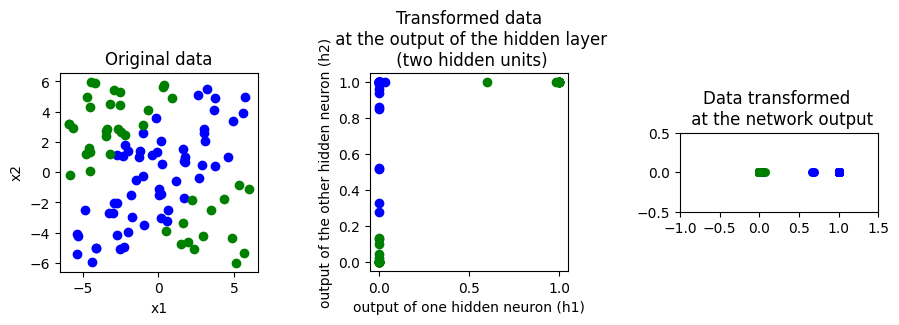

In [23]:
plot_data_transformations(X_test, y_test, w1, w2, w3, w4, w5, w6, b1, b2, b3, language='English')

### Tasas de aprendizaje

Tensorflow playground [Tensorflow](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=3&regularizationRate=0&noise=35&networkShape=1&seed=0.68448&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) . 

- Presione el botón *ejecutar* y vea el proceso de aprendizaje durante 500 épocas. ¿Qué observas?
- Deja de entrenar y presiona el botón *reiniciar*. Cambie la tasa de aprendizaje de 3 a 0.1 y presione el botón *ejecutar* nuevamente. ¿Qué es diferente de la ejecución anterior?
- Pruebe estos pasos usando tres tasas de aprendizaje: 0.3, 0.03 y 0.003:
  + Presiona el botón *restablecer*
  + Cambiar la tasa de aprendizaje
  + Presione el botón *paso* (ubicado a la derecha del botón *ejecutar*) varias veces y observe cómo cambia la pérdida de entrenamiento/prueba en cada paso.
 
¿Cuál de esas tres tasas usarías? 

### Regularización

Tensorflow playground [Tensorflow](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=50&networkShape=4,4&seed=0.64895&showTestData=false&discretize=false&percTrainData=10&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). 

Primero observemos algunas cosas sobre este ejemplo. Vamos a *Mostrar datos de prueba*. Desmarque la casilla nuevamente. Como puede ver, los datos son ruidosos y la cantidad de ejemplos de entrenamiento es pequeña. Esta es una situación propensa al sobreajuste. 
- Presione el botón *ejecutar* y deje que el entrenamiento continúe durante 500 épocas, luego pause el entrenamiento.
- ¿Qué opinas sobre el límite de decisión del clasificador?
- ¿Qué causa la diferencia entre el error de entrenamiento y el error de prueba? (Vuelva a marcar la casilla *Mostrar datos de prueba*)
- Anote el error de prueba

Ahora veremos cómo podemos evitar el sobreajuste usando la regularización $L_2$.
- Presiona el botón *reiniciar*
- Cambiar *regularización* de *Ninguno* a *L2*
- Cambiar *Tasa de regularización* de 0 a 0,3
- Presione el botón *ejecutar* y ejecute el modelo durante 500 épocas
- ¿Qué es diferente de la configuración anterior?
- Anote el error de prueba

Al igual que la tasa de aprendizaje, las diferentes tasas de regularización afectarán el rendimiento del clasificador. Pruebe estos pasos con tasas de regularización 0.03 y 0.003:
- Presiona el botón *reiniciar*
- Cambio *Tasa de regularización*
- Presione el botón *ejecutar* y ejecute el modelo durante 500 épocas
- Anote el error de prueba

¿Cuál de estas tasas de regularización utilizaría?